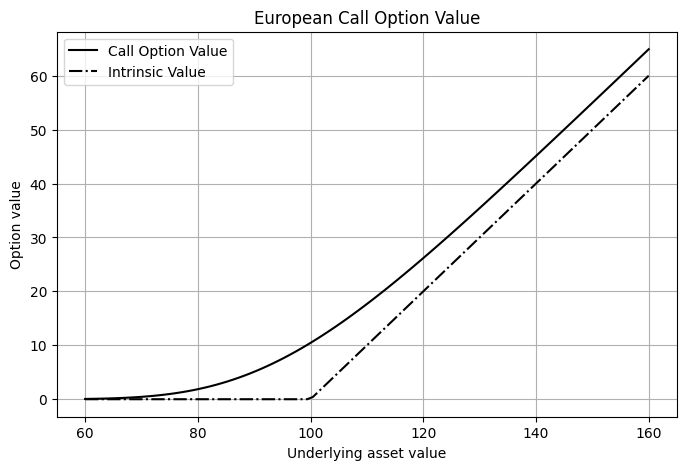

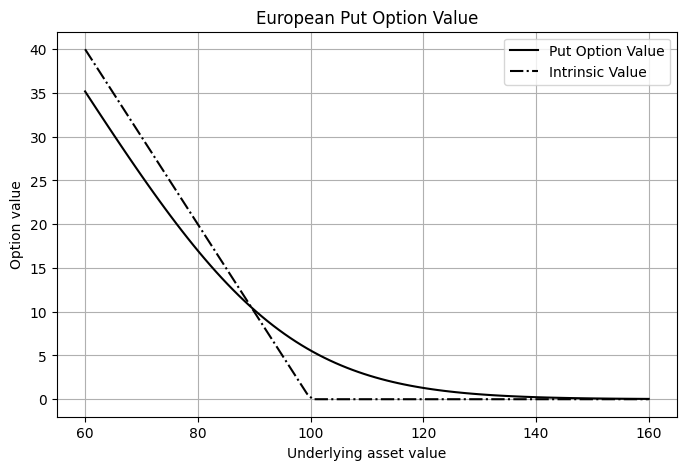

In [1]:
# Re-import necessary libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the Black-Scholes function for European call and put options
def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Define parameters
K = 100  # Strike price
T = 1    # Time to maturity (1 year)
r = 0.05 # Risk-free rate
sigma = 0.2 # Volatility
S = np.linspace(60, 160, 100) # Range of underlying asset prices

# Compute option values
call_values = black_scholes(S, K, T, r, sigma, option_type="call")
put_values = black_scholes(S, K, T, r, sigma, option_type="put")

# Compute intrinsic values
call_intrinsic = np.maximum(S - K, 0)
put_intrinsic = np.maximum(K - S, 0)

# Create figure for Call Option
plt.figure(figsize=(8, 5))
plt.plot(S, call_values, label="Call Option Value", color='black')
plt.plot(S, call_intrinsic, linestyle='dashdot', label="Intrinsic Value", color='black')
plt.xlabel("Underlying asset value")
plt.ylabel("Option value")
plt.title("European Call Option Value")
plt.legend()
plt.grid(True)
plt.show()

# Create figure for Put Option
plt.figure(figsize=(8, 5))
plt.plot(S, put_values, label="Put Option Value", color='black')
plt.plot(S, put_intrinsic, linestyle='dashdot', label="Intrinsic Value", color='black')
plt.xlabel("Underlying asset value")
plt.ylabel("Option value")
plt.title("European Put Option Value")
plt.legend()
plt.grid(True)
plt.show()
